<a href="https://colab.research.google.com/github/ramoants254/Customer-Response-M.L-Project/blob/main/customer_response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('/content/drive/MyDrive/playground-series-s4e7.zip (Unzipped Files)/train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
Gender,Male,Male,Female,Female,Female
Age,21,43,25,35,36
Driving_License,1,1,1,1,1
Region_Code,35.0,28.0,14.0,1.0,15.0
Previously_Insured,0,0,1,0,1
Vehicle_Age,1-2 Year,> 2 Years,< 1 Year,1-2 Year,1-2 Year
Vehicle_Damage,Yes,Yes,No,Yes,No
Annual_Premium,65101.0,58911.0,38043.0,2630.0,31951.0
Policy_Sales_Channel,124.0,26.0,152.0,156.0,152.0


In [5]:
df=df.drop('id',axis=1)

In [6]:
df.shape

(11504798, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB


In [8]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [10]:
df=pd.get_dummies(data=df,drop_first=True)

In [11]:
sample_df=df.sample(n=6000000)
df2=sample_df.drop('Response',axis=1)

<Axes: title={'center': 'Correlation with Response'}>

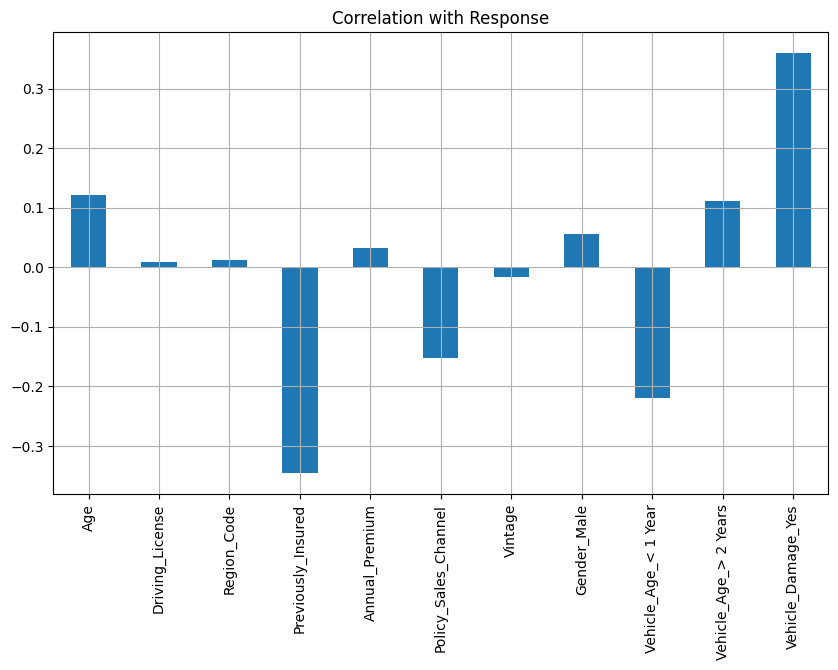

In [12]:
df2.corrwith(sample_df.Response).plot.bar(figsize=(10,6),title="Correlation with Response",grid=True)
# df2.corrwith(df.Selling_Price).plot.bar(figsize=(10,6),title="Correlation with Selling Price",grid=True)

## Split Train Split

In [13]:
X=df.drop('Response',axis=1)
y=df['Response']

In [14]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Chosing the Right Model

In [16]:
# model=RandomForestRegressor()

In [17]:
# model.fit(X_train,y_train)

In [18]:
# y_pred=model.predict(X_test)

In [19]:
# r2_score(y_test,y_pred)

In [20]:
model2=XGBRegressor(n_jobs=-1,random_state=42,max_depth=6,learning_rate=0.1,n_estimators=500)
# model2=XGBRegressor(n_estimator=100000,learning_rate=0.05,n_jobs=4)

In [21]:
%%time
model2.fit(X_train,y_train)


# model2.fit(X_train,y_train,early_stopping_rounds=5,
#              eval_set=[(X_test, y_test)],
#              verbose=False)

CPU times: user 11min 10s, sys: 33.3 s, total: 11min 43s
Wall time: 7min 28s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
y_pred=model2.predict(X_test)

In [23]:
r2_score(y_test,y_pred)

0.23297464912071564